# Problem Statement
- This is FIFA-20 dataset with 18,000+ rows & 100+ columns.
- Using clustering algorithms to categorize similar players using their traits and their different skills in the field.

- Importing the libraries

In [1]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from matplotlib import rcParams

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Loading the dataset
data=pd.read_csv("C:/Users/CANARA/DATAMITES/Data/PRCP-1004-Fifa20/Data/players_20.csv",parse_dates=True)

# EDA

In [4]:
data.head(2)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3


In [5]:
data.shape

(18278, 104)

In [6]:
data.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

- As this is a football players dataset, we have a mix of all kinds of players and goal keepers. But we cannot analyse a goalkpeer in the same way as that of a player. So let us drop some columns and segregate the goal keepers from other players for separate analysis.

In [7]:
data.drop(['player_url','sofifa_id','long_name','team_jersey_number','loaned_from','nation_jersey_number', \
           'player_tags','nation_position','team_jersey_number','player_positions',\
          'goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes'], axis = 1, inplace = True)

- We can drop the player_positions column as it has too many tags attached to each player. Let's keep the team positions column as it has only one tag attached to each player.

In [8]:
data['age'].value_counts().head()

22    1446
21    1375
23    1358
27    1324
25    1319
Name: age, dtype: int64

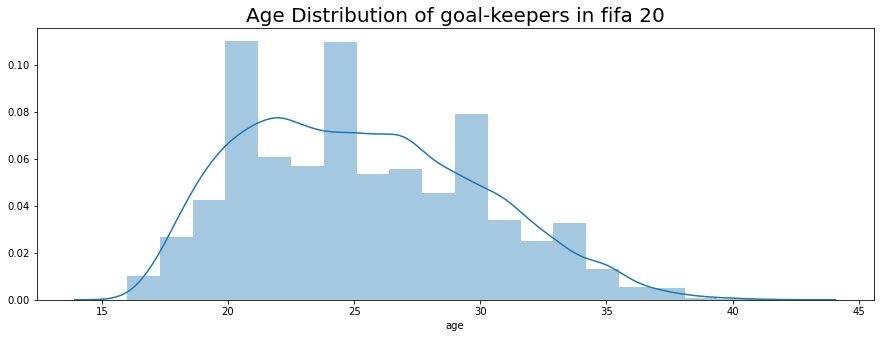

In [9]:
plt.figure(figsize=(15,5))
plt.title('Age Distribution of goal-keepers in fifa 20', fontsize=20)
sns.distplot(a=data['age'], kde=True, bins=20)

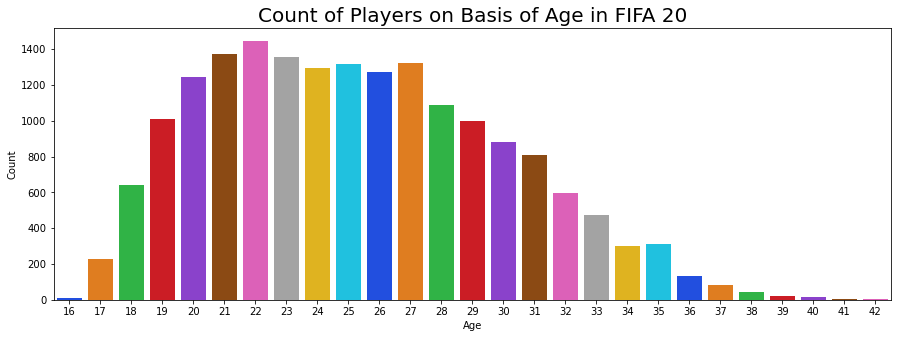

In [10]:
plt.figure(figsize= (15,5))

ax = sns.countplot(x='age', data=data, palette='bright')
ax.set_title(label='Count of Players on Basis of Age in FIFA 20', fontsize=20)

ax.set_xlabel(xlabel='Age', fontsize=10)
ax.set_ylabel(ylabel='Count', fontsize=10)

plt.show()

- The age of maximum players lie between 20 to 27 years with a mean of around 25 years¶
- The minimum age of the players in the game is 16 years whereas the maximum age is 42 year

In [11]:
data['nationality'].value_counts().head()

England      1667
Germany      1216
Spain        1035
France        984
Argentina     886
Name: nationality, dtype: int64

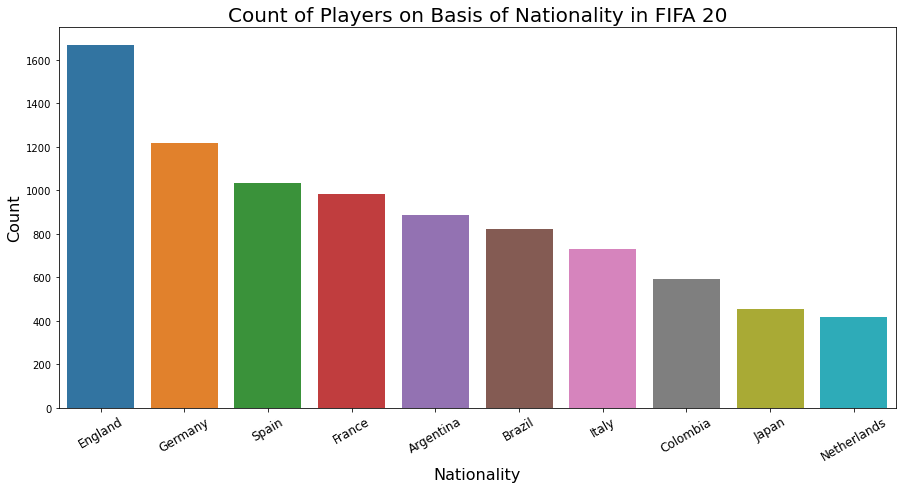

In [12]:
plt.figure(figsize= (15, 7))

ax = sns.countplot(x='nationality', data=data, palette=None, order=data.nationality.value_counts().iloc[:10].index)
ax.set_title(label='Count of Players on Basis of Nationality in FIFA 20', fontsize=20)

ax.set_xlabel(xlabel='Nationality', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.xticks(rotation=30, fontsize=12)

plt.show()

In [20]:
data['height_cm'].value_counts()

180    1468
178    1213
185    1193
183    1160
175     990
188     904
182     833
184     820
186     774
177     722
181     704
187     682
176     669
179     641
190     585
173     567
174     483
191     464
170     455
189     439
172     412
193     316
192     290
171     262
168     195
194     173
169     149
196     139
195     136
167     102
165      68
166      60
197      51
198      35
163      29
164      21
199      14
162      12
201      11
200      10
203       6
161       5
202       4
158       3
159       3
160       3
156       1
157       1
205       1
Name: height_cm, dtype: int64

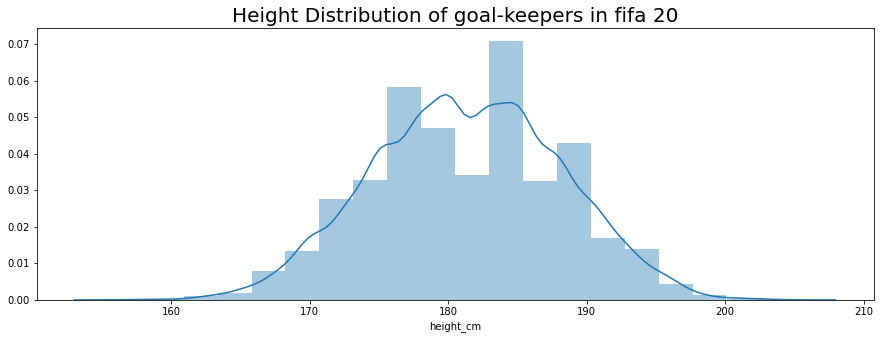

In [21]:
plt.figure(figsize=(15,5))
plt.title('Height Distribution of goal-keepers in fifa 20', fontsize=20)
sns.distplot(a=data['height_cm'], kde=True, bins=20)

In [25]:
df = data.filter(['club','overall'])

Text(0, 0.5, 'Number of players')

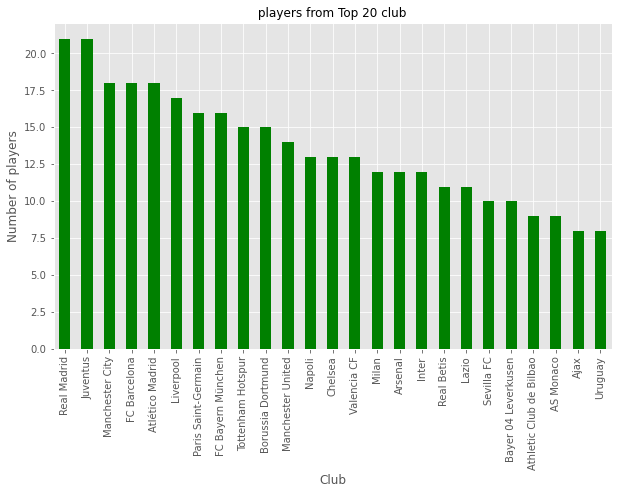

In [26]:
df = df[df.overall>=80]
df =df['club'].value_counts()
df=df.head(25)
rcParams['figure.figsize']= 10,6
with plt.style.context(('ggplot')):df.plot(kind='bar',color = 'green')
plt.title(' players from Top 20 club ')
plt.xlabel('Club')
plt.ylabel('Number of players')

In [27]:
data['preferred_foot'].value_counts()

Right    13960
Left      4318
Name: preferred_foot, dtype: int64

Text(0.5, 1.0, 'Count of Players on Basis of preferred_foot in FIFA 20')

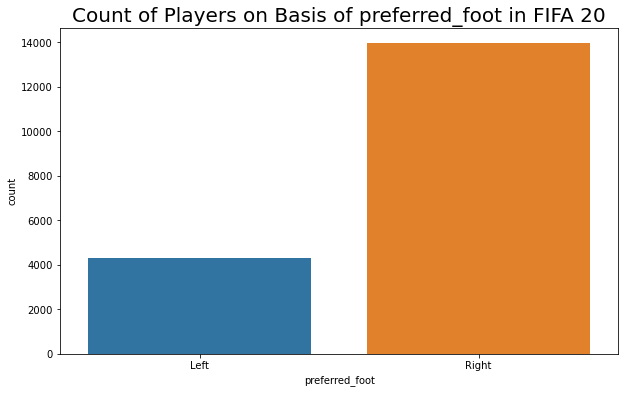

In [28]:
ax = sns.countplot(x='preferred_foot', data=data, palette=None)
ax.set_title(label='Count of Players on Basis of preferred_foot in FIFA 20', fontsize=20)

# Analyze the data for goal-keepers

In [29]:
data['team_position'].isnull().sum()

240

In [30]:
data['team_position'].fillna(data['team_position'].mode()[0],inplace=True)

In [31]:
data['team_position'].isnull().sum()

0

In [32]:
# For goalkeepers
data_gk=data.loc[data['team_position'] == "GK"]
data_gk.head(2)

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,team_position,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
3,J. Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,GK,2014-07-16,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,M. ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,90,93,67500000,250000,Right,3,4,1,Medium/Medium,Normal,Yes,143400000.0,GK,2014-07-01,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,88.0,85.0,88.0,90.0,45.0,88.0,"Swerve Pass, Acrobatic Clearance, Flair Passes",18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
data_oth=data.loc[data['team_position']!="GK"]
data_oth.head(2)

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,team_position,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,RW,2004-07-01,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,LW,2018-07-10,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3


In [34]:
data_gk_null=data_gk.isnull().sum()
data_gk_null

short_name                      0
age                             0
dob                             0
height_cm                       0
weight_kg                       0
nationality                     0
club                            0
overall                         0
potential                       0
value_eur                       0
wage_eur                        0
preferred_foot                  0
international_reputation        0
weak_foot                       0
skill_moves                     0
work_rate                       0
body_type                       0
real_face                       0
release_clause_eur             41
team_position                   0
joined                         41
contract_valid_until            0
pace                          662
shooting                      662
passing                       662
dribbling                     662
defending                     662
physic                        662
gk_diving                       0
gk_handling   

- Primary traits of a goal keeper are speed, positioning, reflexes, diving and handling. Goal keepers are not much associated with pace, shooting, passing,dribbling or defending. So let us drop some of these columns which don't hold much significance in goalkeeping and have null values,i.e approx 3.6%

In [35]:
data_gk=data_gk.drop(['dob','pace','shooting','passing','dribbling','defending','physic','player_traits',\
                      'ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm',\
                      'cm','rcm','rm','lwb','ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb'],axis=1)
data_gk.head(2)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,team_position,joined,contract_valid_until,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,GK,2014-07-16,2023.0,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18
6,M. ter Stegen,27,187,85,Germany,FC Barcelona,90,93,67500000,250000,Right,3,4,1,Medium/Medium,Normal,Yes,143400000.0,GK,2014-07-01,2022.0,88.0,85.0,88.0,90.0,45.0,88.0,18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10


In [36]:
data_gk.shape

(662, 56)

In [37]:
data_gk['overall'].value_counts().head()

66    52
67    49
73    44
68    42
70    42
Name: overall, dtype: int64

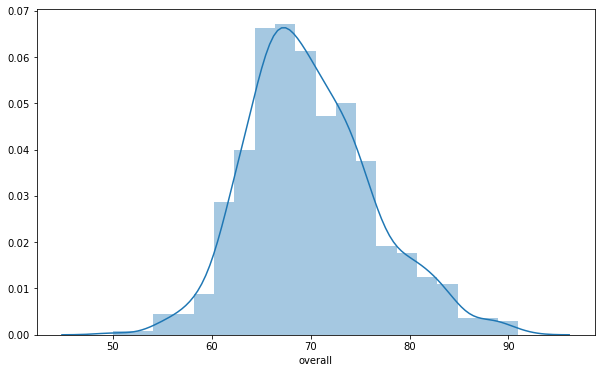

In [38]:
sns.distplot(a=data_gk['overall'], kde=True, bins=20)

- The goal keepers have overall value in the range 50-90, with a mean of 69.

In [39]:
data_gk['wage_eur'].value_counts().head()

1000    153
2000    104
3000     73
4000     43
5000     37
Name: wage_eur, dtype: int64

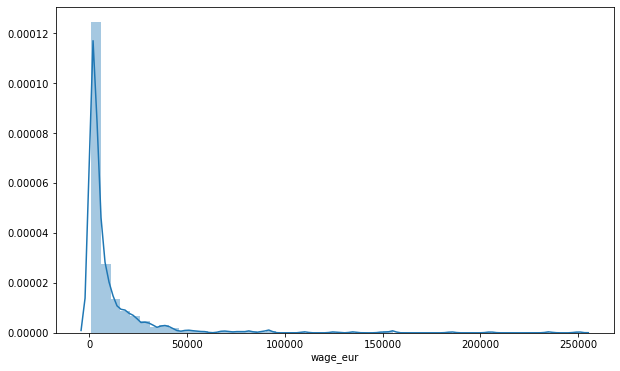

In [40]:
sns.distplot(a=data_gk['wage_eur'], kde=True)

- The wage seems relatively less about 50K euros for the goalkeepers. The players may have higher wages. 

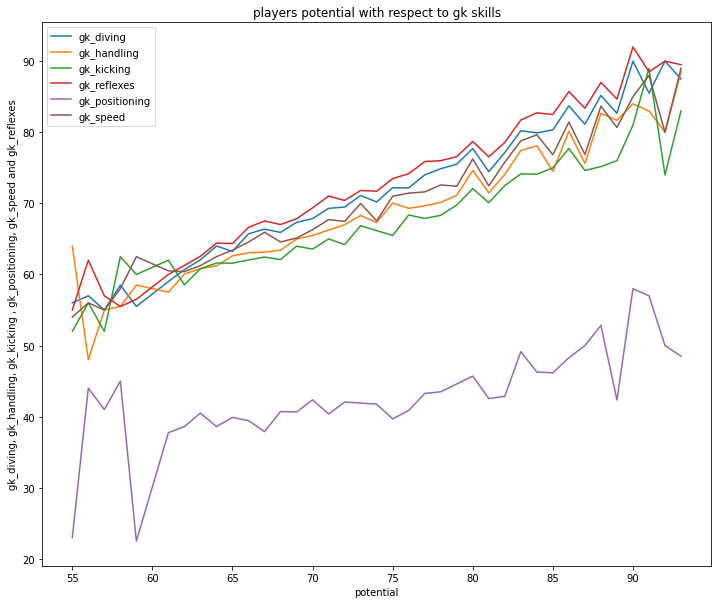

In [41]:
rcParams['figure.figsize']= 12,10
sns.lineplot('potential' ,'gk_diving', data=data_gk,legend='brief',ci=None).set_title('players potential with respect to gk skills')
sns.lineplot('potential','gk_handling',data=data_gk,legend='brief',ci=None)
sns.lineplot('potential','gk_kicking',data=data_gk,legend='brief',ci=None)
sns.lineplot('potential','gk_reflexes',data=data_gk,legend='brief',ci=None)
sns.lineplot('potential','gk_speed',data=data_gk,legend='brief',ci=None)
sns.lineplot('potential','gk_positioning',data=data_gk,legend='brief',ci=None).set_ylabel('gk_diving, gk_handling, gk_kicking , gk_positioning, gk_speed and gk_reflexes')
plt.legend(['gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_positioning','gk_speed'])
plt.show()

- The handling and reflexes are higher for all the goal keepers, compared to other traits.

# Analysis for players

In [42]:
# For other players
data_oth=data.loc[data['team_position'] != "GK"]
data_oth.head(2)

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,team_position,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,RW,2004-07-01,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,LW,2018-07-10,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3


- Drop the insignificant columns which have NaN values

In [43]:
data_oth.isnull().sum()

short_name                        0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club                              0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur             1257
team_position                     0
joined                         1247
contract_valid_until            240
pace                           1374
shooting                       1374
passing                        1374
dribbling                      1374
defending                      1374
physic                      

In [44]:
data_oth=data_oth.drop(['dob','work_rate','real_face','gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed',\
                     'gk_positioning','player_traits'],axis=1)
data_oth.head(5)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,body_type,release_clause_eur,team_position,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,Messi,195800000.0,RW,2004-07-01,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,C. Ronaldo,96500000.0,LW,2018-07-10,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,Neymar,195200000.0,CAM,2017-08-03,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,Normal,184500000.0,LW,2019-07-01,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
5,K. De Bruyne,28,181,70,Belgium,Manchester City,91,91,90000000,370000,Right,4,5,4,Normal,166500000.0,RCM,2015-08-30,2023.0,76.0,86.0,92.0,86.0,61.0,78.0,93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


In [45]:
data1=data_oth
data1
data1.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,body_type,release_clause_eur,team_position,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,Messi,195800000.0,RW,2004-07-01,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,C. Ronaldo,96500000.0,LW,2018-07-10,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,Neymar,195200000.0,CAM,2017-08-03,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,Normal,184500000.0,LW,2019-07-01,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
5,K. De Bruyne,28,181,70,Belgium,Manchester City,91,91,90000000,370000,Right,4,5,4,Normal,166500000.0,RCM,2015-08-30,2023.0,76.0,86.0,92.0,86.0,61.0,78.0,93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


In [46]:
data1['joined'].fillna(0,inplace=True)
data1['contract_valid_until'].fillna(0,inplace=True)

In [47]:
data1['joined']= pd.to_datetime(data1['joined'], format='%Y-%m-%d',errors='coerce')

In [48]:
data1['contract_valid_until'] =data1['contract_valid_until'].astype(int)
data1['contract_valid_until'].head()

0    2021
1    2022
2    2022
4    2024
5    2023
Name: contract_valid_until, dtype: int32

# Bivariate analysis

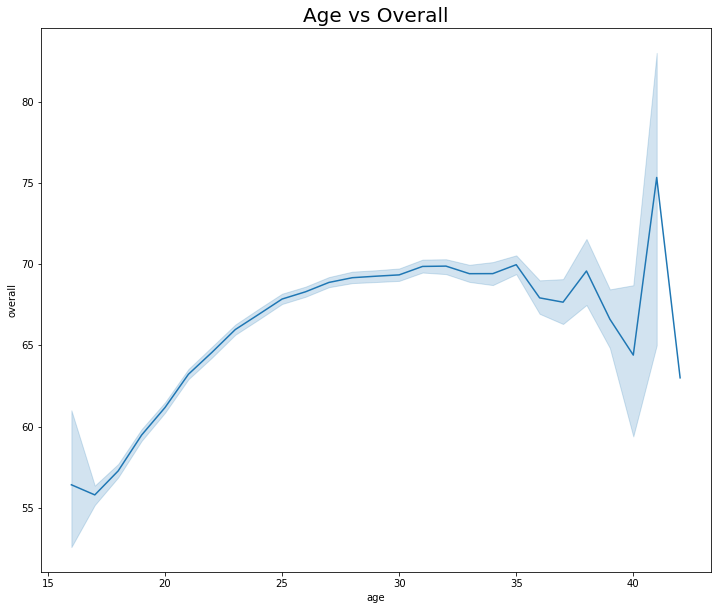

In [49]:
# Age vs Overall
avp = sns.lineplot(data1['age'], data1['overall'], palette = 'Wistia')
plt.title('Age vs Overall', fontsize = 20)

plt.show()

- In the graph of Overall of the players, we observed that the players are improving with the step of the years. The best players are 30 years old and after that they start to decline. It is seen that in the 40 there is a peak in the graph again, this may be due to the veterans included in the games.

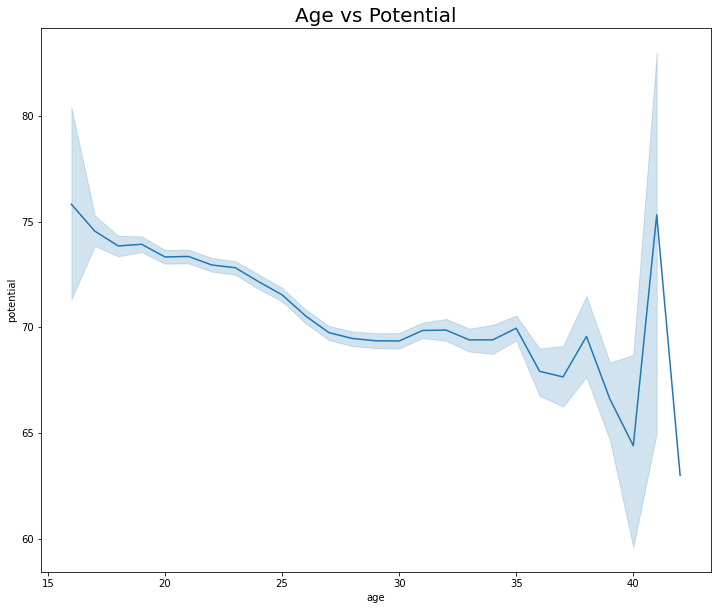

In [50]:
# Age vs potential
avp = sns.lineplot(data1['age'], data1['potential'], palette = 'Wistia')
plt.title('Age vs Potential', fontsize = 20)
plt.show()

- The potential for players in mid age from 20-30 has almost remained the same with slight variation, & eventually players above 35 have higher potentials, which gradully reduced with increase in age 

In [51]:
data1['wage_eur'].head()

0    565000
1    405000
2    290000
4    470000
5    370000
Name: wage_eur, dtype: int64

In [52]:
data1['value_eur'].head()

0     95500000
1     58500000
2    105500000
4     90000000
5     90000000
Name: value_eur, dtype: int64

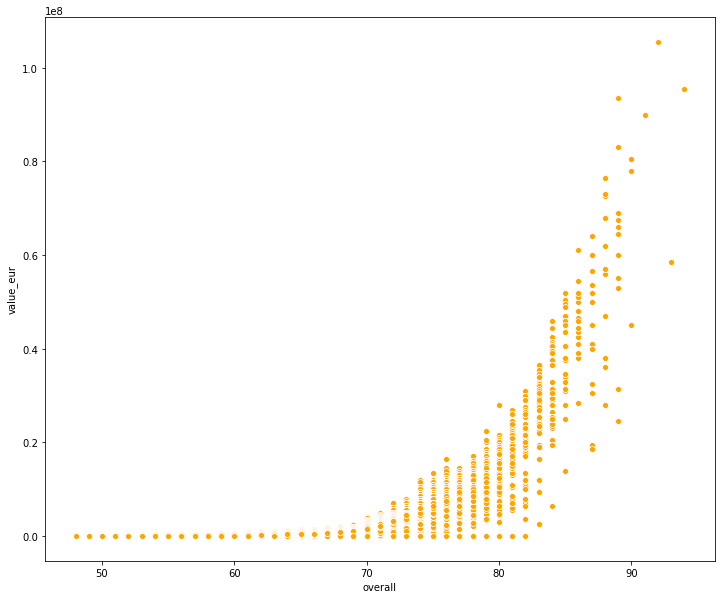

In [53]:
sns.scatterplot(x= 'overall' ,y='value_eur', data=data1, color = 'orange')

In [54]:
data1['release_clause_eur'].head()

0    195800000.0
1     96500000.0
2    195200000.0
4    184500000.0
5    166500000.0
Name: release_clause_eur, dtype: float64

In [55]:
data1['release_clause_eur'].isnull().sum()

1257

In [56]:
data1['release_clause_eur']=data1['release_clause_eur'].fillna((data1['release_clause_eur'].mean()))

In [57]:
data1['release_clause_eur'] =data1['release_clause_eur'].astype(int)

In [58]:
data_val=data1.loc[:,['value_eur','release_clause_eur']]
data_val.head(10)

,value_eur,release_clause_eur
0,95500000,195800000
1,58500000,96500000
2,105500000,195200000
4,90000000,184500000
5,90000000,166500000
7,78000000,150200000
8,45000000,92300000
9,80500000,148900000
10,93500000,191700000
11,67500000,119800000


Text(0, 0.5, 'value in euros billions')

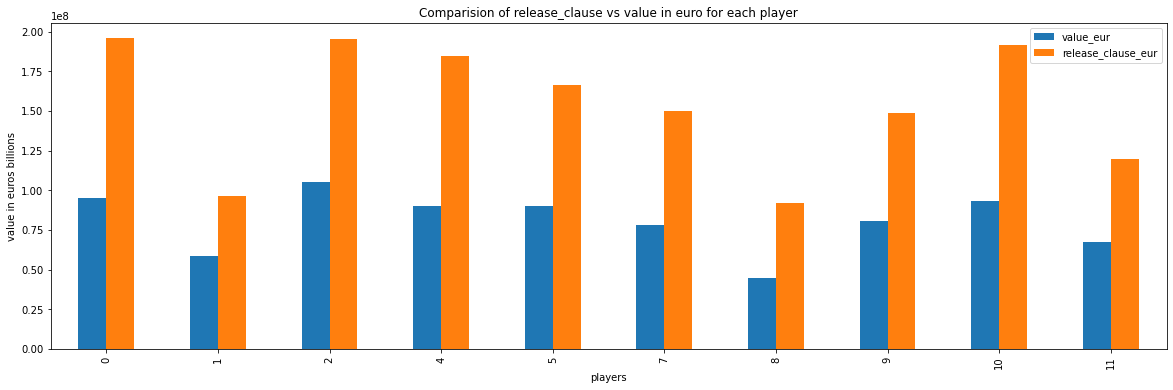

In [59]:
data_val.head(10).plot(kind = 'bar', figsize=(20,6))
plt.title('Comparision of release_clause vs value in euro for each player')
plt.xlabel('players')
plt.ylabel('value in euros billions')

- The release clause value is always higher than the value of each player.

In [60]:
data1['international_reputation'].value_counts()

1    16215
2     1082
3      271
4       43
5        5
Name: international_reputation, dtype: int64

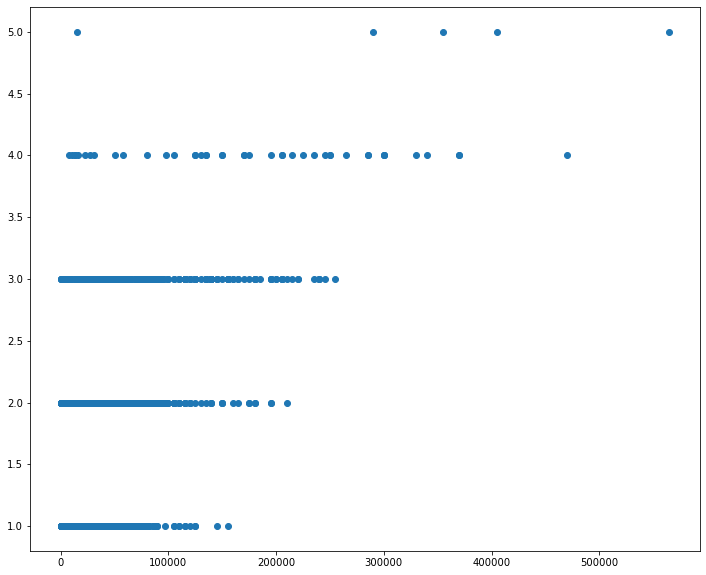

In [61]:
x=data1['wage_eur']
y=data1['international_reputation']
plt.scatter(x, y)
plt.show()

- The plot gives a general idea that players with higher reputation have higher wages,and these two columns have a positive correlation

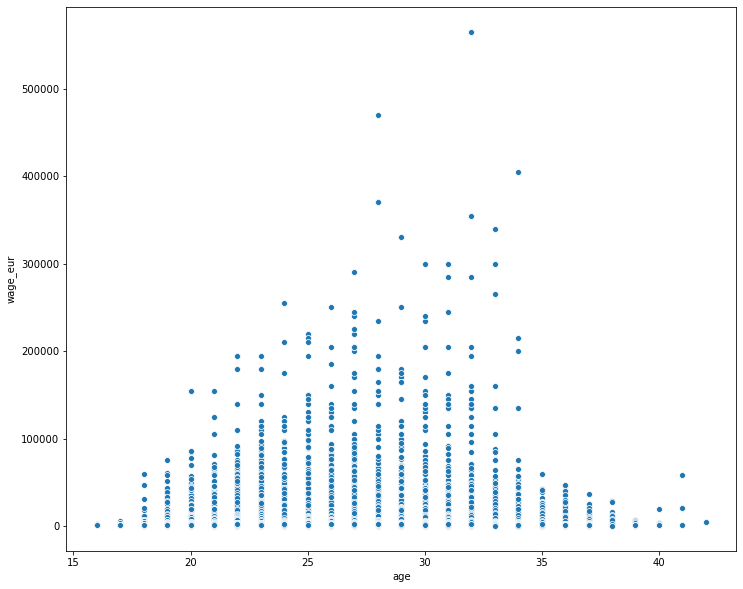

In [62]:
sns.scatterplot(x= 'age' ,y='wage_eur', data=data1,hue=None)

- The wage is distributed in the mid range with players in the age 20-34 having major amount of wages, it eventually declined with higher age players. Also young players who are considered as beginners also don't have major wages. 

In [63]:
data1['pace'] = data1['pace'].fillna((data1['pace'].mean()))
data1['shooting'] = data1['shooting'].fillna((data1['shooting'].mean()))
data1['passing'] = data1['passing'].fillna((data1['passing'].mean()))
data1['dribbling'] = data1['dribbling'].fillna((data1['dribbling'].mean()))
data1['defending'] = data1['defending'].fillna((data1['defending'].mean()))
data1['physic'] = data1['physic'].fillna((data1['physic'].mean()))

In [64]:
df = data1.loc[:,['short_name','defending','physic','pace','shooting','dribbling','passing']]
df.head()

,short_name,defending,physic,pace,shooting,dribbling,passing
0,L. Messi,39.0,66.0,87.0,92.0,96.0,92.0
1,Cristiano Ronaldo,35.0,78.0,90.0,93.0,89.0,82.0
2,Neymar Jr,32.0,58.0,91.0,85.0,95.0,87.0
4,E. Hazard,35.0,66.0,91.0,83.0,94.0,86.0
5,K. De Bruyne,61.0,78.0,76.0,86.0,86.0,92.0


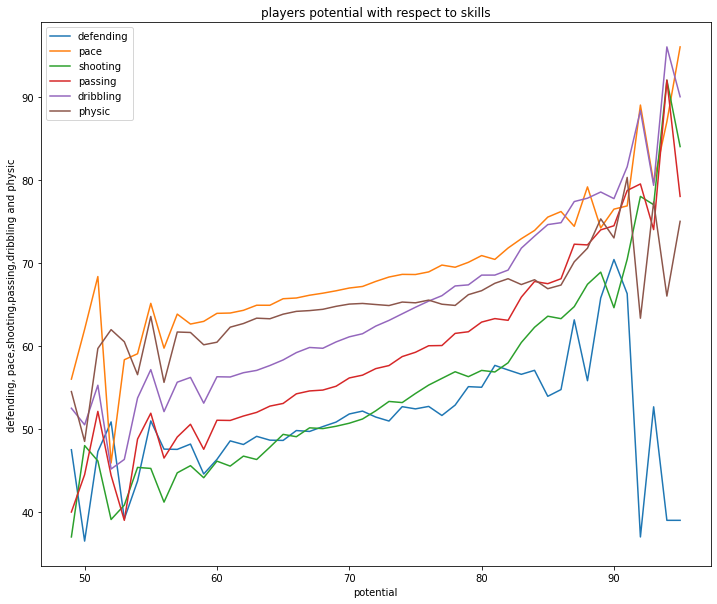

In [65]:
rcParams['figure.figsize']= 12,10
sns.lineplot('potential' ,'defending', data=data1,legend='brief',ci=None).set_title('players potential with respect to skills')
sns.lineplot('potential','pace',data=data1,legend='brief',ci=None)
sns.lineplot('potential','shooting',data=data1,legend='brief',ci=None)
sns.lineplot('potential','passing',data=data1,legend='brief',ci=None)
sns.lineplot('potential','dribbling',data=data1,legend='brief',ci=None)
sns.lineplot('potential','physic',data=data1,legend='brief',ci=None).set_ylabel('defending, pace,shooting,passing,dribbling and physic')
plt.legend(['defending','pace','shooting','passing','dribbling','physic'])
plt.show()

- We can analyze players have steady increase in traits like dribbling,pace & shooting above the potential of 60, and less defending skills. 

- Also we can observe that the players are in different positions in team_position, so let us create another position that can be one for the following five:
- Reserve
- Substitute
- Defender
- Midfielder
- Forward

In [66]:
def label_pos (row):
    if(row.team_position == "RB" or row.team_position == "CB" or row.team_position == "LB" or 
       row.team_position == "LWB" or row.team_position == "RCB"or row.team_position == "RWB" or 
       row.team_position == "LCB"):
        return 'Defender'
    if(row.team_position == "RW" or row.team_position == "CF" or row.team_position == "LW" or 
       row.team_position == "ST" or row.team_position == "RS"or row.team_position == "LS"
       or row.team_position == "LF"or row.team_position == "RF"):
        return 'Forward'
    if(row.team_position == "RM" or row.team_position == "CM" or row.team_position == "LM"
       or row.team_position == "CAM" or row.team_position == "LDM" or row.team_position == "RDM"
      or row.team_position == "LAM"or row.team_position == "RAM" or row.team_position == "CDM"
       or row.team_position == "RCM"or row.team_position == "LCM"):
        return 'MidFielder'
    if (row.team_position == "SUB"):
        return 'Substitute'
    if (row.team_position == "RES"):
        return 'Reserve'
    return "other"

data1['field_position'] = data1.apply (lambda row: label_pos(row), axis=1)

- Let us analyze the main characteristics like pace,shooting,passing,dribbling,defending,physic & overall according to each position.

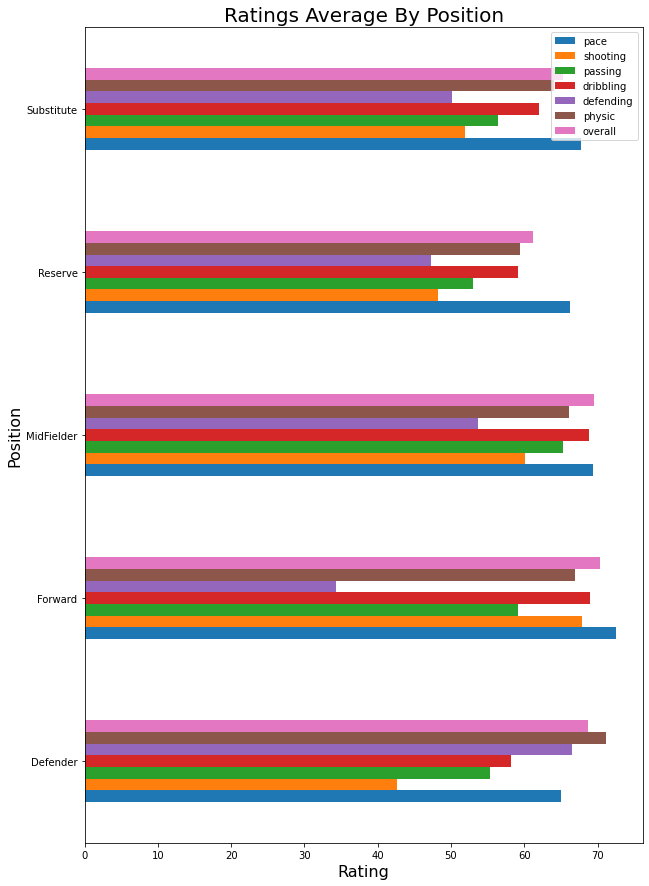

In [67]:
ratingsByPositions = data1.groupby([data1['field_position']]).mean()
ratingsByPositions = ratingsByPositions
ratingsByPositions = ratingsByPositions[['pace','shooting','passing','dribbling','defending','physic','overall']]
ratingsByPositions.plot(kind='barh', figsize=(10,15))

plt.title('Ratings Average By Position',fontsize=20)
plt.xlabel('Rating',fontsize=16)
plt.ylabel('Position',fontsize=16);

- We can see that the traits change for each player wrt to the position in which they are playing. The mid-fielder and forward have higher shooting and dribbling whereas the defender has more defending trait compared to other players.

Text(0, 0.5, '')

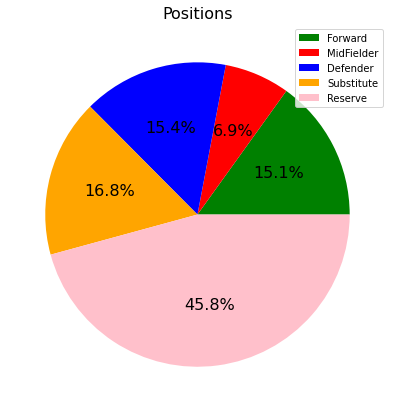

In [68]:
by_pos = data1.groupby(data1['field_position']).count().age

by_pos.plot(kind='pie',figsize=(7,7), colors=['green','red','blue','orange','pink','grey'], labels=None, autopct='%1.1f%%', fontsize=16)

plt.legend(labels=data1['field_position'].unique())
plt.title('Positions', fontsize=16)
plt.ylabel('')

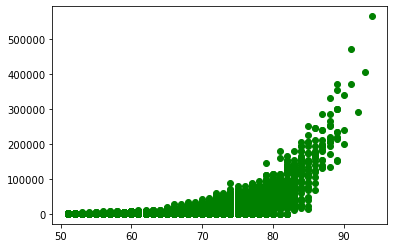

In [69]:
%matplotlib inline
y=data1[data1["overall"]>50]
plt.scatter(y["overall"],y["wage_eur"],color="green")

- The wages are significantly higher for players with overall above 90 

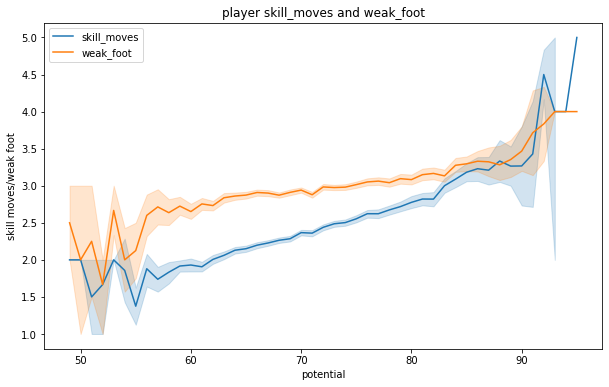

In [70]:
rcParams['figure.figsize']= 10,6
sns.lineplot('potential' ,'skill_moves', data=data1,legend='brief').set_title('player skill_moves and weak_foot')
sns.lineplot('potential','weak_foot',data=data1,legend='brief').set_ylabel('skill moves/weak foot')
plt.legend(['skill_moves','weak_foot'])
plt.show()

- Players with more skill_moves are stable as compared to players who have weak_foot

Text(0.5, 0, 'skill move and weak foot')

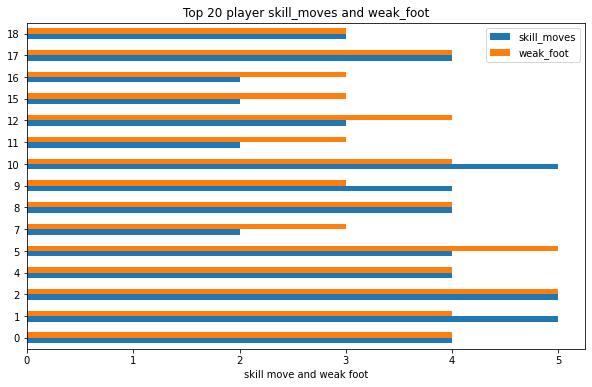

In [71]:
data1_sw = data1.loc[:,['skill_moves','weak_foot']]
data1_sw = data1_sw.head(15)
data1_sw.plot(kind = 'barh', figsize=(10,6) )
plt.title('Top 20 player skill_moves and weak_foot')
plt.xlabel('skill move and weak foot')

- The above plot denotes weather players are able to balance their skill moves with weak_foot.

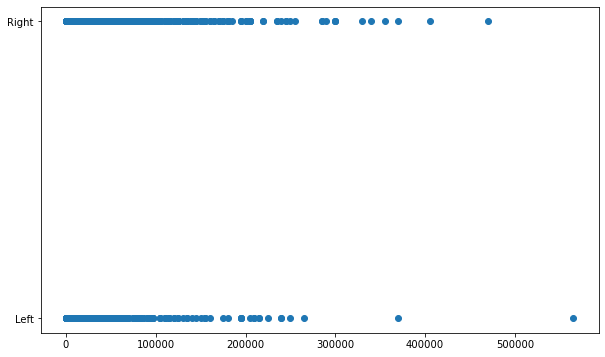

In [72]:
x=data1['wage_eur']
y=data1['preferred_foot']
plt.scatter(x, y)
plt.show()

- We can asses from the above plot that although more players are Right footed, but the left footed players have higher wage in euros. That can be due to their potential in playing. Further analysis is needed to determine this factor

Text(0.5, 1.0, 'Bodytype vs wage in eur')

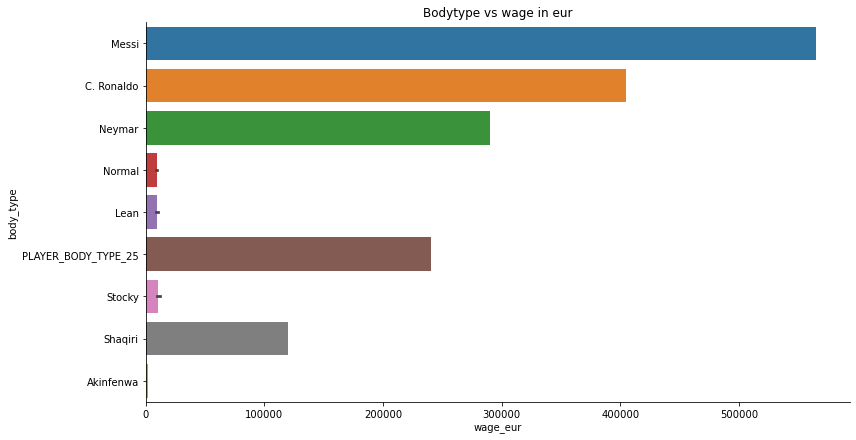

In [73]:
sns.catplot(y="body_type",
            x="wage_eur",data=data1,
           height=6,kind="bar",aspect=2)
plt.title("Bodytype vs wage in eur")

- The wages are significantly higher for players like Messi, Neymar and Ronaldo irrespective of their body type.

In [74]:
columns = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb']

In [75]:
for col in columns:
     data1[col]=data1[col].str.split('+',n=1,expand = True)[0]        
data1[['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb']]=data1[columns]
data1[columns] = data1[columns].fillna(0)
data1.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,body_type,release_clause_eur,team_position,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,field_position
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,Messi,195800000,RW,2004-07-01,2021,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63,Forward
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,C. Ronaldo,96500000,LW,2018-07-10,2022,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,Forward
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,Neymar,195200000,CAM,2017-08-03,2022,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,89,66,61,61,61,66,61,46,46,46,61,MidFielder
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,Normal,184500000,LW,2019-07-01,2024,91.0,83.0,86.0,94.0,35.0,66.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,83,83,83,89,88,88,88,89,89,89,89,89,83,83,83,89,66,63,63,63,66,61,49,49,49,61,Forward
5,K. De Bruyne,28,181,70,Belgium,Manchester City,91,91,90000000,370000,Right,4,5,4,Normal,166500000,RCM,2015-08-30,2023,76.0,86.0,92.0,86.0,61.0,78.0,93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73,MidFielder


In [76]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
enc=LabelEncoder()
data1.loc[:,['nationality','club','body_type','team_position','field_position','preferred_foot']]=data1.loc[:,['nationality','club','body_type','team_position','field_position','preferred_foot']].apply(enc.fit_transform)
data1.head(2)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,body_type,release_clause_eur,team_position,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,field_position
0,L. Messi,32,170,72,5,224,94,94,95500000,565000,0,5,4,4,3,195800000,24,2004-07-01,2021,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63,1
1,Cristiano Ronaldo,34,187,83,120,350,93,93,58500000,405000,1,5,4,5,1,96500000,13,2018-07-10,2022,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,1


In [77]:
data1['overall'].min()

48

# Clustering analysis

- Let us do K-means clustering to cluster the players based on their traits and different skills 

In [78]:
data1.columns

Index(['short_name', 'age', 'height_cm', 'weight_kg', 'nationality', 'club',
       'overall', 'potential', 'value_eur', 'wage_eur', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'body_type',
       'release_clause_eur', 'team_position', 'joined', 'contract_valid_until',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'men

In [79]:
data1=data1[['short_name','age','overall','value_eur','international_reputation','skill_moves',\
             'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',\
             'field_position']]

In [80]:
data1 = data1[data1.overall > 50]

In [81]:
names = data1.short_name.tolist()

In [82]:
data1 = data1.drop(['short_name'], axis = 1) # drop the short_name column
data1.head()

,age,overall,value_eur,international_reputation,skill_moves,pace,shooting,passing,dribbling,defending,physic,field_position
0,32,94,95500000,5,4,87.0,92.0,92.0,96.0,39.0,66.0,1
1,34,93,58500000,5,5,90.0,93.0,82.0,89.0,35.0,78.0,1
2,27,92,105500000,5,5,91.0,85.0,87.0,95.0,32.0,58.0,2
4,28,91,90000000,4,4,91.0,83.0,86.0,94.0,35.0,66.0,1
5,28,91,90000000,4,4,76.0,86.0,92.0,86.0,61.0,78.0,2


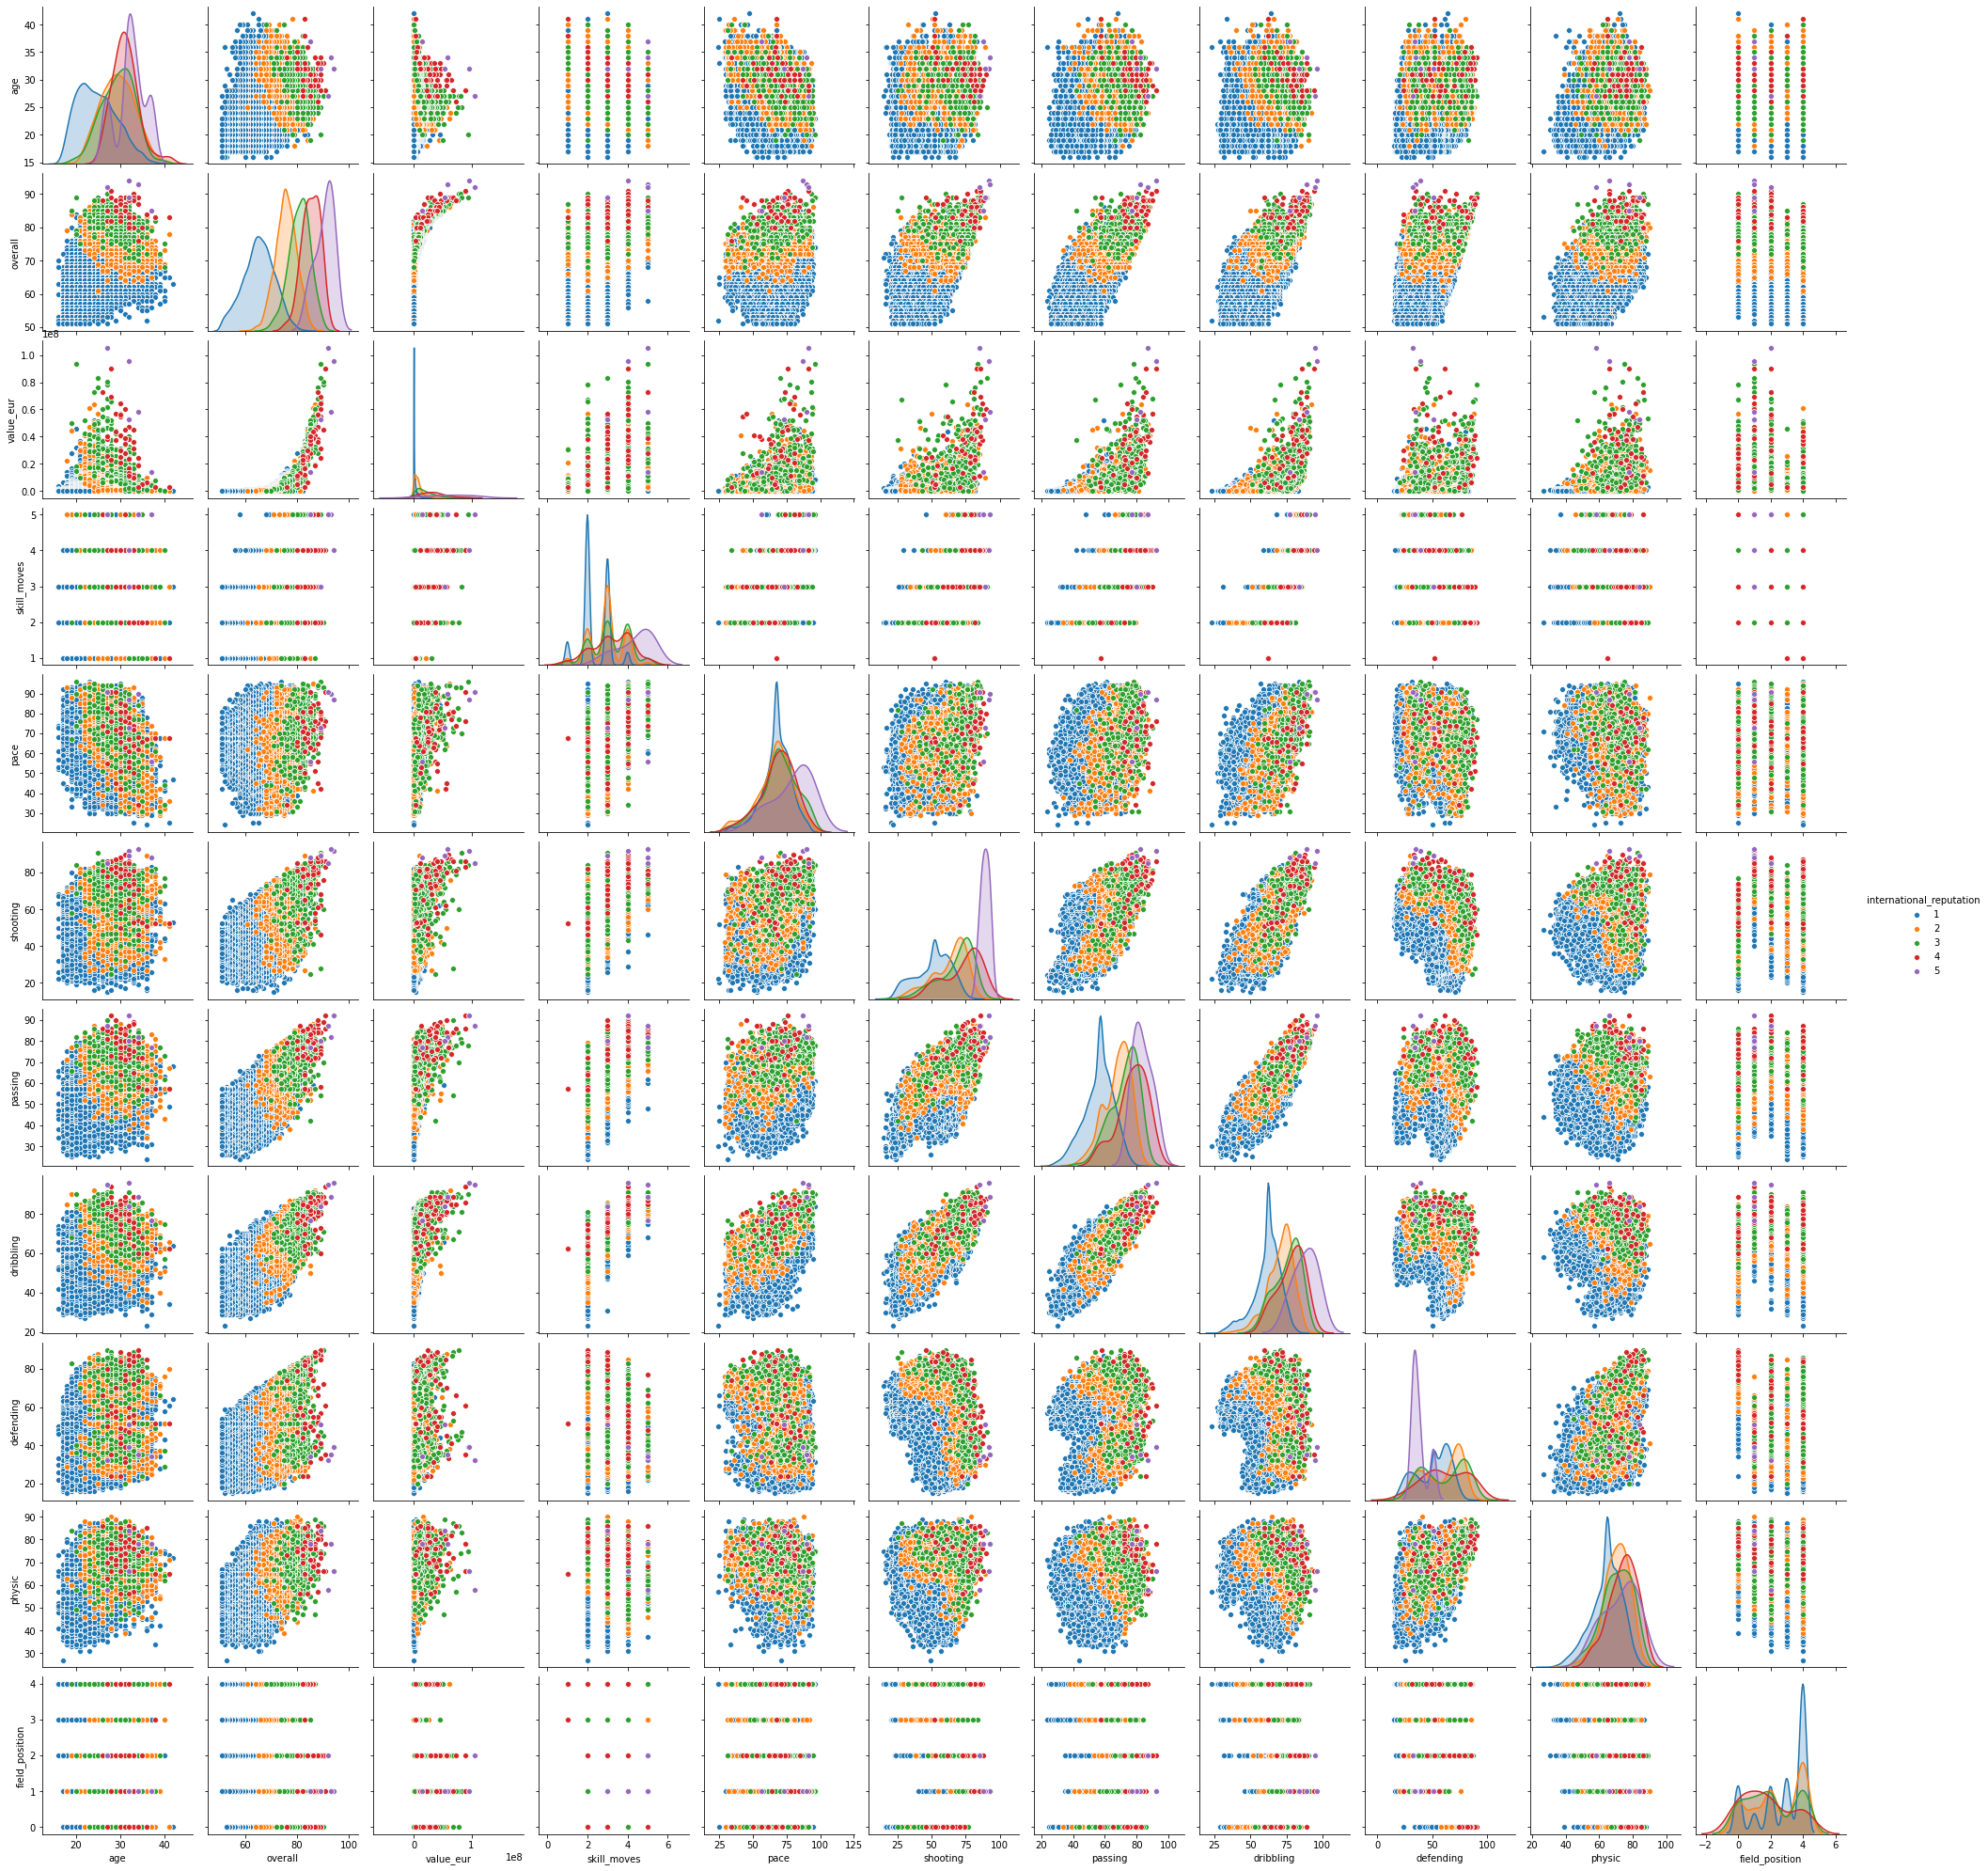

In [83]:
sns.pairplot(data1,hue ='international_reputation' )

In [84]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [85]:
from sklearn import preprocessing
x = data1.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

In [86]:
#K means to determine K
distortions = []
K=range(1,10)
for k in K:
    kmeanModel=KMeans(n_clusters=k)
    kmeanModel.fit(x)
    distortions.append(sum(np.min(cdist(x,kmeanModel.cluster_centers_,'euclidean'),axis=1))/x.shape[0])

In [87]:
distortions

[2797872.2865698915,
 2011127.3907569957,
 1229278.164066472,
 1031331.569290082,
 799085.8842757747,
 700351.1030526699,
 611338.909813016,
 570760.1197012024,
 539996.9488842047]

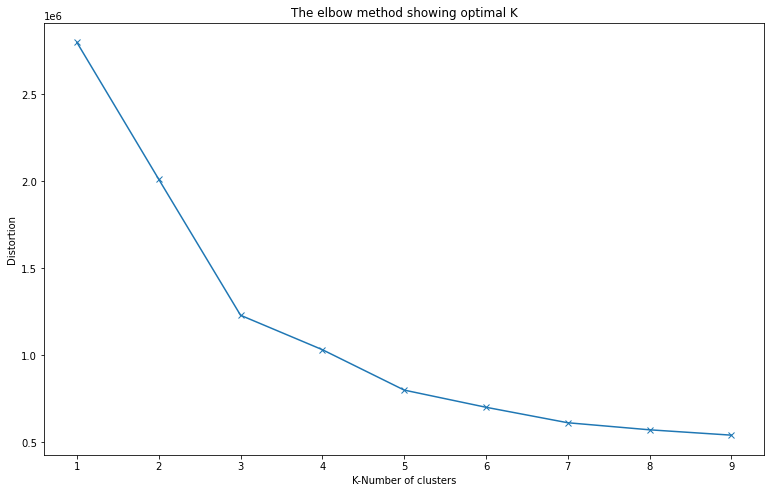

In [88]:
#Plot
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_xticks(range(1,25))
ax.set_xlabel('K-Number of clusters')
ax.set_ylabel('Distortion')
ax.set_title('The elbow method showing optimal K')
ax.plot(K,distortions,marker='x')
plt.show()

In [89]:
km =KMeans(n_clusters = 5)
km
y_predicted=km.fit_predict(data1[['age','overall','value_eur','field_position','international_reputation',\
                                 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',\
                                 'skill_moves']])
y_predicted

array([2, 2, 2, ..., 0, 0, 0])

In [90]:
km.cluster_centers_

array([[2.49787144e+01, 6.40989322e+01, 7.61296231e+05, 2.80553002e+00,
        1.02623577e+00, 6.69367817e+01, 5.01424202e+01, 5.51764272e+01,
        6.06105793e+01, 5.02930312e+01, 6.38430086e+01, 2.29715013e+00],
       [2.64388889e+01, 8.37500000e+01, 3.24500000e+07, 1.81111111e+00,
        2.52222222e+00, 7.62466767e+01, 7.08644256e+01, 7.53248197e+01,
        7.95503509e+01, 6.02839278e+01, 7.22097409e+01, 3.41111111e+00],
       [2.66904762e+01, 8.79761905e+01, 6.40595238e+07, 1.57142857e+00,
        3.23809524e+00, 7.73095238e+01, 7.54761905e+01, 7.95000000e+01,
        8.36428571e+01, 5.98571429e+01, 7.38333333e+01, 3.59523810e+00],
       [2.54820717e+01, 7.85803453e+01, 1.38771580e+07, 2.15670651e+00,
        1.61487384e+00, 7.26917746e+01, 6.52152564e+01, 7.01270072e+01,
        7.47977704e+01, 6.00104575e+01, 7.14769412e+01, 3.19787517e+00],
       [2.65897772e+01, 7.41485365e+01, 5.74853648e+06, 2.34076016e+00,
        1.24945391e+00, 7.04005494e+01, 6.06649590e+01, 6.51

In [93]:
X = data1.values

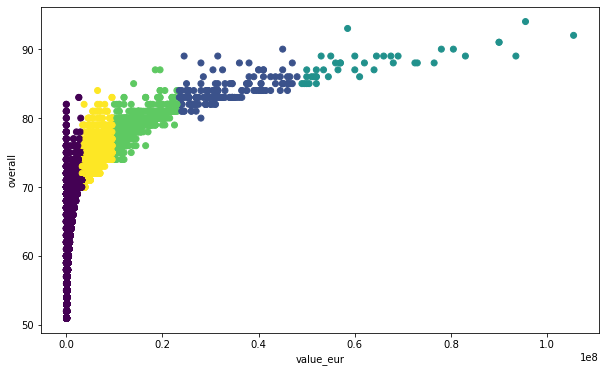

In [94]:
plt.scatter(X[:, 2], X[:, 1],c=y_predicted.astype(np.float))
plt.xlabel('value_eur')
plt.ylabel('overall')

plt.show()

- The algorithm has classified the players into 5 clusters with teal color clusters having more wages and overall increased traits. The yellow ones have overall ratings from 70-90 with mid range values in euros. The purple cluster players have overall from 50-80 and have lower value in euros. 